#Keras

## *Keras는 Python으로 작성 되었으며 TensorFlow, CNTK, Theano와 같은 Deep Learning 라이브러리 위에서 실행할 수 있는 High-level Neural Network API 입니다.*

## 케라스 임포트

In [25]:
import numpy as np
np.random.seed(123)  # for reproducibility

import keras
	
from keras.utils import np_utils

import tensorflow as tf

from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9019544395899123227
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 6008708139912216074
physical_device_desc: "device: XLA_CPU device"
]


# 데이타

## Load your data from disk

<img src=https://www.pyimagesearch.com/wp-content/uploads/2018/09/keras_tutorial_step2.png>

## Construct your training and testing splits

from sklearn.model_selection import train_test_split

(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

<img src=https://www.pyimagesearch.com/wp-content/uploads/2018/09/keras_tutorial_step3.png>

(60000, 28, 28)


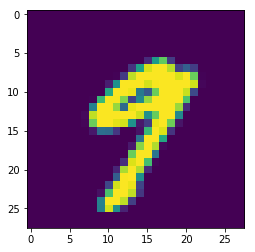

In [14]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()


print(X_train.shape)
# (60000, 28, 28)

from matplotlib import pyplot as plt
#plt.imshow(X_train[20])

plt.imshow(X_test[20])

#전처리

In [16]:
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

print(X_train.shape)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train.shape)

print(y_train.shape)

# 6. Preprocess class labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print(Y_train.shape)

print(y_train[10])
print(Y_train[10])

(60000, 1, 28, 28)
(60000, 1, 28, 28)
(60000,)
(60000, 10)
3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


#모델

## Define your Keras model architecture

<img src=https://www.pyimagesearch.com/wp-content/uploads/2018/09/keras_tutorial_simplenn_arch.png>

Keras에서 레이어(Layer)들을 구성하는 방법으로 사용되는 핵심적인 자료구조형은 모델(Model)입니다. 

그 중에서도 가장 간단한 형태의 모델은 레이어들을 선형으로 쌓는 Sequential Model 입니다.

In [0]:
from keras.models import Sequential

model = Sequential()

In [0]:
import os

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# 체크포인트 콜백 만들기
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


레이어는 다음과 같이 간단하게 .add()를 통해 추가할 수 있습니다.

In [28]:
from keras.layers import Dense, Dropout, Activation, Flatten

model.add(Dense(units=64, activation='relu', input_shape=(1,28,28)))

model.add(Flatten())

model.add(Dense(units=10, activation='softmax'))

print("#### Sequential Model")
model.summary()

ValueError: ignored

In [29]:
!ls {checkpoint_dir}

ls: cannot access 'training_1': No such file or directory


## Compile your Keras model

<img src=https://www.pyimagesearch.com/wp-content/uploads/2018/09/keras_tutorial_step5.png>

.compile()을 통해 학습 방법을 설정

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

## Fit your Keras model to the data
<img src=https://www.pyimagesearch.com/wp-content/uploads/2018/09/keras_tutorial_step6.png>

.fit()을 통해 모델에 직접 학습데이터(Train Data)를 넣어 학습 시킬 수 있습니다.

케라스를 이용하여 텐서보드를 이용하는 방법은 전에 2가지 방법 설명 하였습니다.

텐서보드를 사용하지 않아도 간단히 정확도와 loss 값은 그래프로 아래와 같이 확인 가능합니다.

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.6588 - acc: 0.8335
Epoch 2/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.3562 - acc: 0.8991
Epoch 3/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.3156 - acc: 0.9107
Epoch 4/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.2914 - acc: 0.9170
Epoch 5/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.2729 - acc: 0.9226
Epoch 6/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.2576 - acc: 0.9267
Epoch 7/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.2438 - acc: 0.9309
Epoch 8/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.2313 - acc: 0.9349
Epoch 9/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.2206 - acc: 0.9376
Epoch 10/10
60000/60000 [===========================

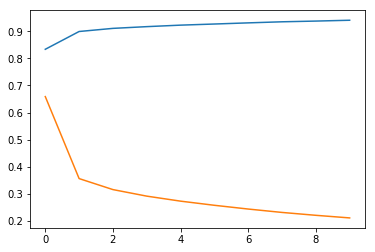

In [7]:
hist = model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

plt.plot(hist.history["acc"], label="train_acc")
plt.plot(hist.history["loss"])
plt.show()


## Evaluate your Keras model

<img src=https://www.pyimagesearch.com/wp-content/uploads/2018/09/keras_tutorial_step7.png>

모델이 학습이 완료되면, 단 한줄로 평가가 가능합니다.

In [30]:
model.load_weights(checkpoint_path)

loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=128)

print("train, loss and metric: {}".format(loss_and_metrics))


10000/10000 [==============================] - 0s 21us/step
train, loss and metric: [0.20397233510017396, 0.942]


예측(Predict)도 가능합니다.

In [20]:
classes = model.predict(X_test, batch_size=105)

print(classes.shape)

print(classes[20])

(10000, 10)
[5.9923250e-06 7.9125812e-07 2.7436496e-07 3.7508778e-04 2.2964163e-03
 5.5918278e-04 1.0950761e-08 5.9063189e-02 3.1926014e-04 9.3737978e-01]


# 케라스 모델 저장

In [24]:
import tensorflow as tf

saved_model_path = tf.contrib.saved_model.save_keras_model(model, "./saved_models")

model.save("keras_mnist.hdf5")


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



TypeError: ignored

# 모델 불러오기


In [0]:
from keras.models import load_model
model = load_model('keras_mnist.hdf5')